In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1.Loading the dataset

In [3]:
data = pd.read_csv("Mobile_data.csv")

In [4]:
data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
data.shape

(2000, 15)

In [7]:
data.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


# 2.Data-Preprocessing

## 2.1.Handling Missing data

In [8]:
data.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

### No null values

## 2.2.Handling Outliers

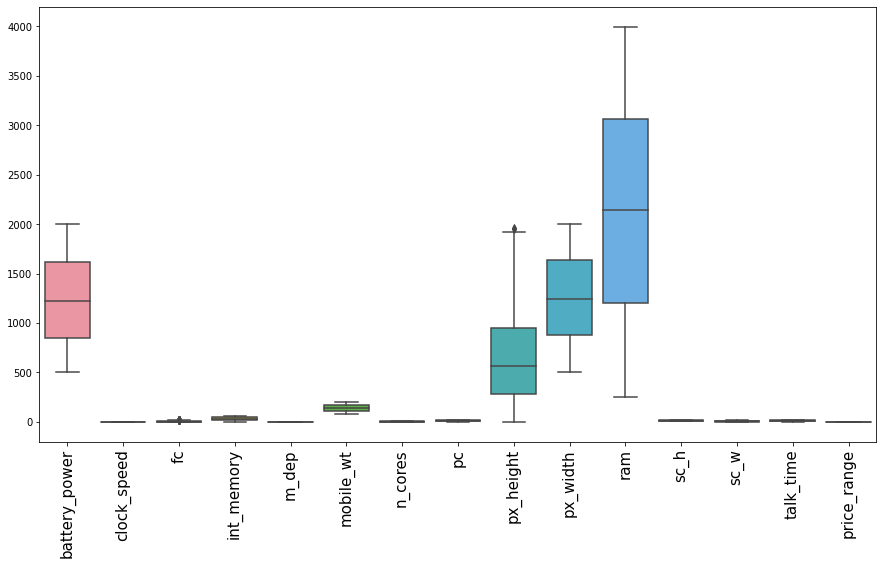

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(data = data)
plt.xticks(rotation=90, fontsize=15)
plt.show()

### No outliers visible on boxplot 

## 2.3.Feature Scaling

In [10]:
# Separating Dependent and independent columns
X = data.drop(["price_range"], axis=1)
y= data["price_range"]

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [12]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,-1.253064,-0.992890,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493
1996,1.653694,1.321096,-0.992890,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303
1997,1.530773,-0.762748,-0.762495,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394
1998,0.622527,-0.762748,-0.071307,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493


# 2.4.Checking for imbalanced dataset

In [13]:
y.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Not imbalanced

# 3.EDA

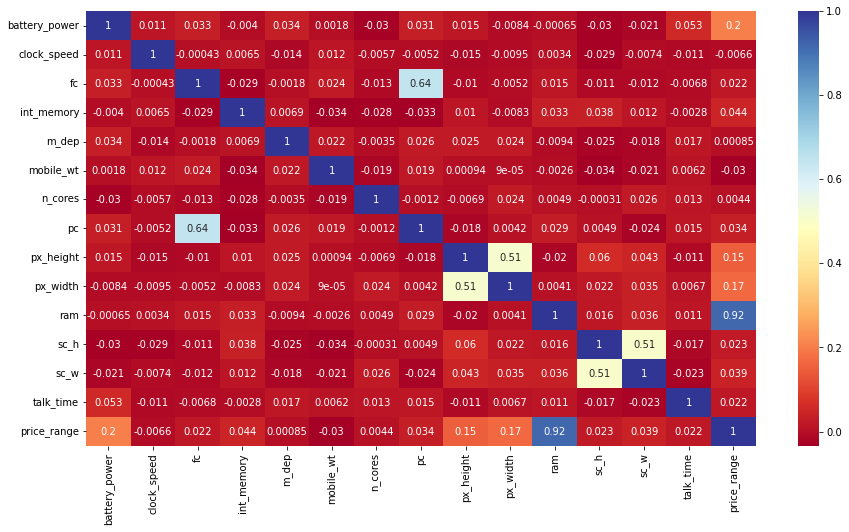

In [14]:
# Plotting correlation matrix
plt.figure(figsize=(15,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="RdYlBu")
plt.show()

## Following Features are postively correlated  :-
        * "pc" and "fc"
        * "ram" and "price_range"
        * "sc_h" and "sc_w"
        * "px_width" and "px_height"
        * "batter_power" and "price_range"
        * "px_height" and "price_range"
        * "px_width" and "price_range"
* "ram" shows the highest positive correlation with our target variable "price_range". Meaning, price of a mobile will increase significantly, if RAM increases and vice-versa

In [15]:
data.head(2)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


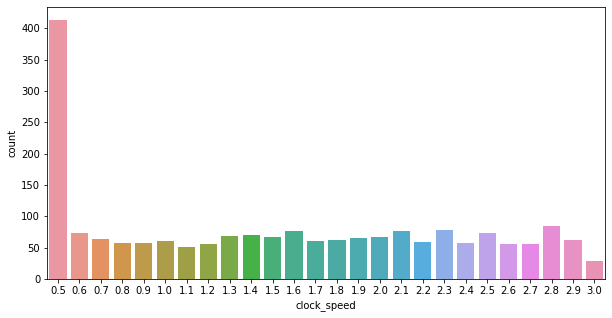

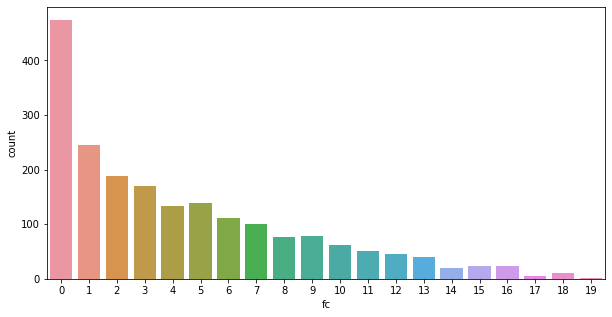

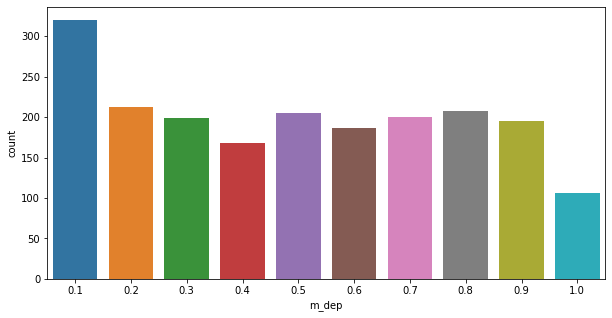

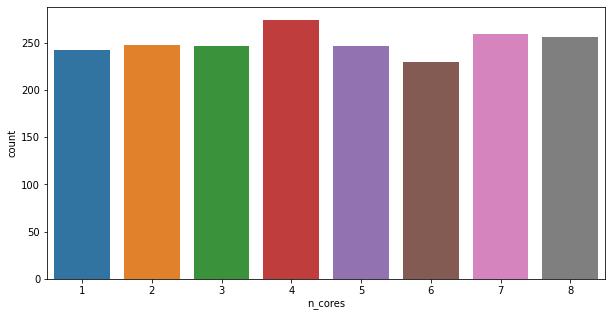

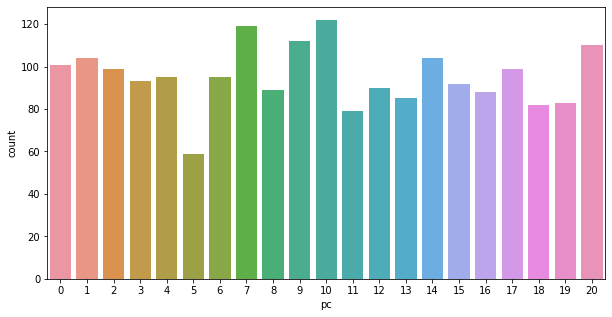

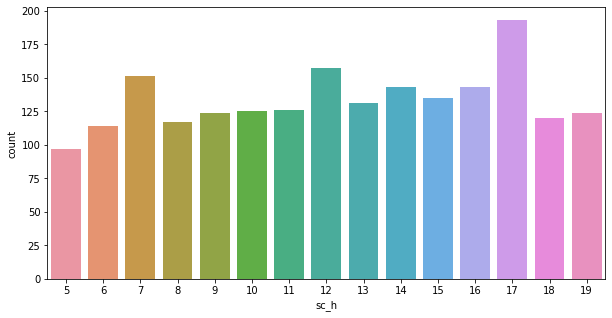

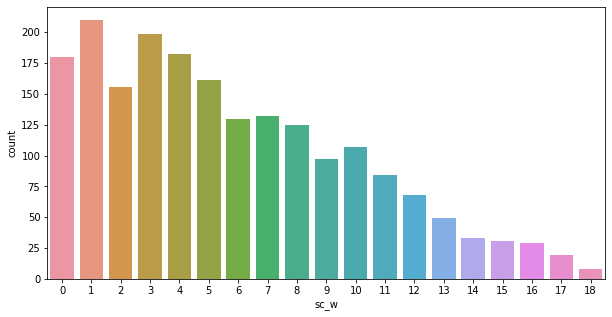

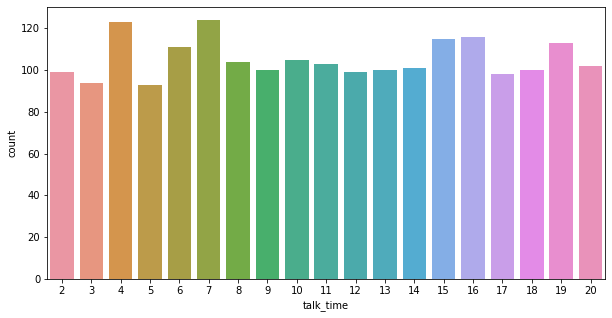

In [17]:
col_list =['clock_speed','fc','m_dep','n_cores', 'pc','sc_h','sc_w', 'talk_time']
for col in col_list:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=data)
    plt.show()

In [18]:
data.head(5)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


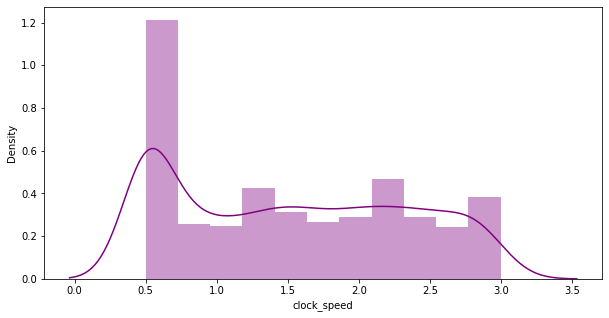

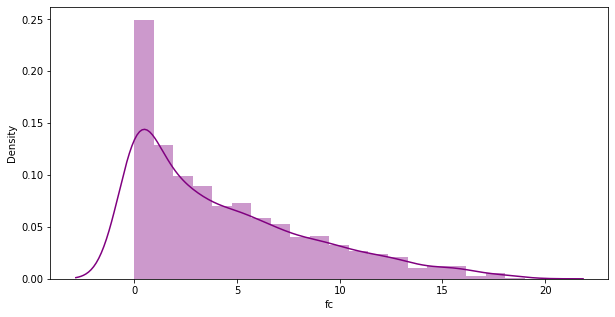

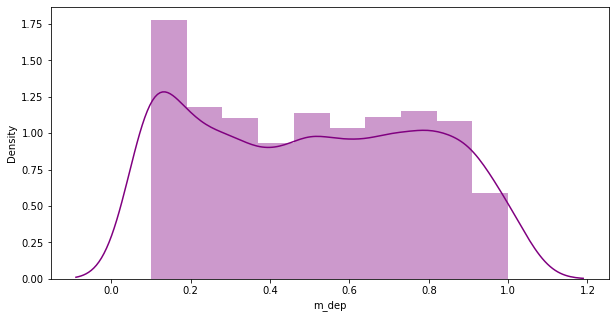

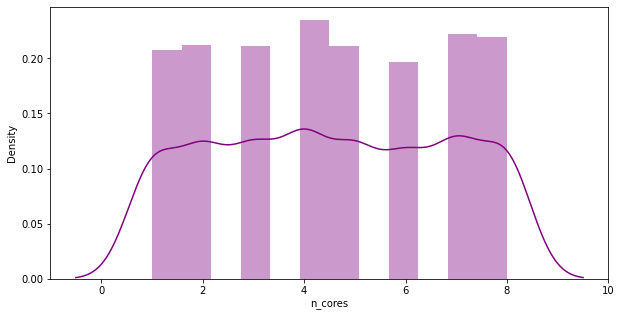

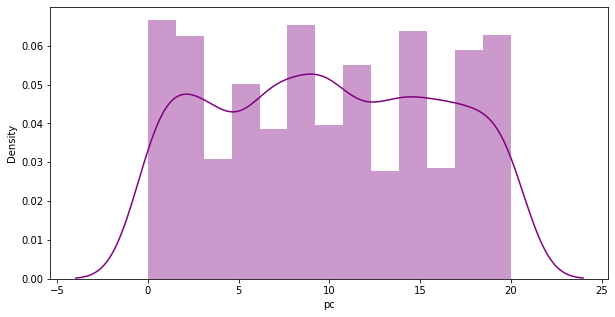

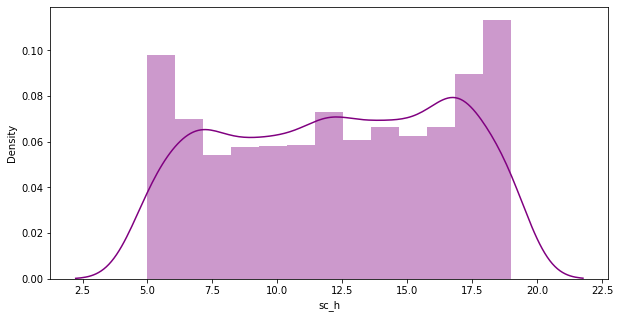

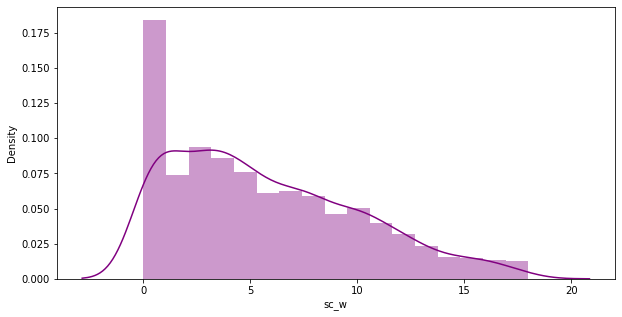

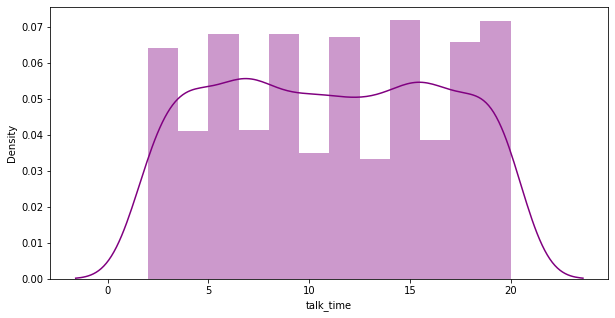

In [19]:
# Distribution of values of numerial variables
for col in col_list:
    plt.figure(figsize=(10,5))
    sns.distplot(x=data[col],color="Purple")
    plt.xlabel(col)
    plt.show()

# 4.Splitting the data into train and test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.4, random_state=101)

# 5.Building Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

# 5.1.Predicting

In [23]:
y_pred = model.predict(X_test)

# 5.2.Performance metrics

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [25]:
print(classification_report(y_test,y_pred,))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       186
           1       0.86      0.94      0.90       189
           2       0.90      0.86      0.88       229
           3       0.94      0.91      0.93       196

    accuracy                           0.91       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.91      0.91      0.91       800



In [26]:
print(confusion_matrix(y_test, y_pred))

[[179   7   0   0]
 [  7 177   5   0]
 [  0  21 196  12]
 [  0   0  17 179]]


In [27]:
print(accuracy_score(y_test,y_pred))

0.91375


# 5.3.Chossing optimum K Value

In [28]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

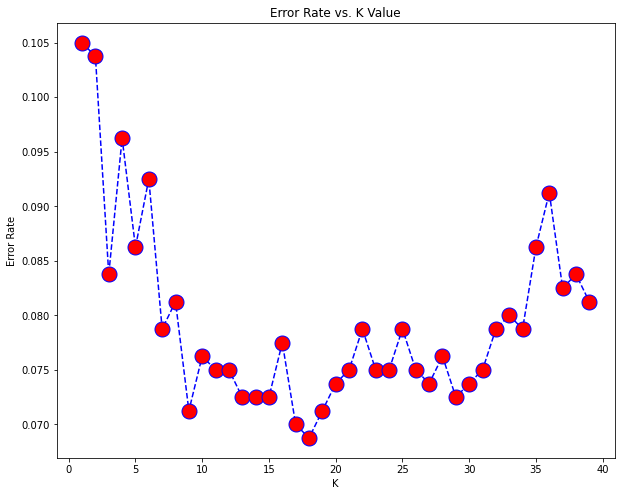

In [29]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=15)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [30]:
# Using K=18
model_18 = KNeighborsClassifier(n_neighbors=18)
model_18.fit(X_train, y_train)
y_pred_18 = model_18.predict(X_test)
print("With K=18")
print("\n")
print(classification_report(y_test,y_pred_18,))
print("\n")
print(confusion_matrix(y_test, y_pred_18))
print("\n")
print(accuracy_score(y_test,y_pred_18))

With K=18


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       186
           1       0.89      0.95      0.92       189
           2       0.91      0.89      0.90       229
           3       0.96      0.92      0.94       196

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



[[182   4   0   0]
 [  7 179   3   0]
 [  0  18 204   7]
 [  0   0  16 180]]


0.93125


# Conclusion:-
    * Optimal value of K = 18